In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 10})
import pandas as pd
import os
import glob
import re

In [7]:
# Folder path where the CSV files are stored
directory = r'C:\Users\lenovo\Documents\Masterarbeit\Programming\output'

In [8]:
A_I_vals = np.linspace(0, 1, 1000)
A_cont_vals = np.linspace(0, 0.5, 1000)

A_I_grid, A_cont_grid = np.meshgrid(A_I_vals, A_cont_vals)

# Masking invalid geometries
mask = (A_cont_grid > 0) & (A_cont_grid < A_I_grid) & (A_cont_grid < (1 - A_I_grid))


# Perfect sphere condition
sphere = A_I_vals - A_I_vals**2 # RuntimeWarning due to forbidden geometries (A_cont < 0 | A_cont > A_I | A_cont > A - A_I)

In [9]:
# Potting trajectories for particles, plotting score
def plot_trajectory_in_n(ax, df, color, nu_range, score_range):
    
    # Plot nu
    nu_f_line, = ax.plot(df[4].values, df[2].values, label=r"$\nu_{f,I}$", color=plt.cm.viridis(color), lw = 4)
    nu_d_line, = ax.plot(df[4].values, df[3].values, label=r"$\nu_{d,I}$", color=plt.cm.viridis(color), linestyle='--', lw = 4)
    ax.axhline(y=df[2].values[0], color = 'black', linestyle = ':', lw = 4)
    
    ax.set_xlabel(r"Time $\frac{t}{\tau_{cont}}$", fontweight = 'bold')
    ax.set_ylabel("Fraction of\n" +r" proteins $\nu_I$", fontweight = 'bold')
    ax.set_ylim(nu_range)
    ax.set_xlim([0, 1])
    
    # Plot score
    ax_score = ax.twinx()
    score_line, =ax_score.plot(df[4].values, df[5].values, color='black', label=r"$s$", lw = 10)
    
    ax_score.set_ylabel(r"Score $s$", fontweight = 'bold')
    ax_score.set_ylim(score_range)

# Function to create contour plot
def plot_contour(ax, df, xlabel):
    df_pivot = df.pivot(index=1, columns=0, values=2) # Score

    X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
    Z = df_pivot.values
    Z = np.round(Z, 2)
    
    contour = ax.contourf(X, Y, Z, levels = 100, cmap='viridis')
    cbar = plt.colorbar(contour, ax=ax) 
    cbar.set_label("Waste disposal\n" + r"efficiency $\mathcal{S}$", fontweight = 'bold')
    
    # Round colorbar ticks to 2 decimal places
    cbar.set_ticks(np.round(cbar.get_ticks(), 2))
    
    ax.set_xlabel(xlabel, fontweight = 'bold')
    ax.set_ylabel("Rescaled line\n" + r"tension $\zeta'$", fontweight = 'bold')

# Plotting Efficiencies with trajectories

# Protein sorting time scale

Errors: [0]


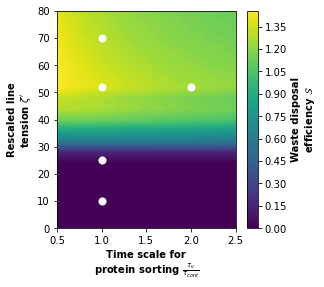

0.57293


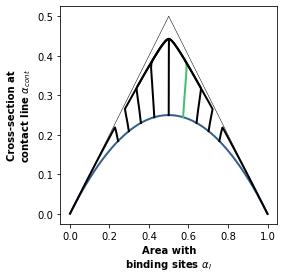

In [24]:
asize = 0.1 # the free energy is rescaled by a/A; therefore, zeta, kappa, are rescaled by a/A; t_a, t_n by the inverse

# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_t_n.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Time scale for\n' + r'protein sorting $\frac{\tau_\nu}{\tau_{cont}}$')

points = [(1, 10), (1,25), (1,52), (2, 52), (1,70)]
for x, y in points:
    ax.scatter(x, y, marker='o', c='white', s=50, zorder=3)
    
# Save plot
plt.savefig(f'figures/Score/t_nu.svg', dpi=300)
plt.show()
plt.close(fig)

fig, ax = plt.subplots(figsize=(4,4))

# Plot the flow plot
ax.plot(A_I_vals, sphere, color=plt.cm.viridis(0.3), linewidth=2, label="Sphere")
ax.plot(np.linspace(0, 0.5, 1000), np.linspace(0, 0.5, 1000), linewidth=0.5, color='black')
ax.plot(np.linspace(0.5, 1, 1000), 1 - np.linspace(0.5, 1, 1000), linewidth=0.5, color='black')
ax.set_xlabel('Area with\n'+ r'binding sites $\alpha_I$', fontweight = 'bold')
ax.set_ylabel('Cross-section at\n' + r'contact line $\alpha_{cont}$', fontweight='bold')
ax.set_aspect(2)

# Add trajectories
for j in range(1, 10):
    file_path = os.path.join(directory, 'trajectories_t_zeta', f'trajectory_1_1_{j}.csv')
    df = pd.read_csv(file_path, header=None)

    if j == 6:
        print(df[0][0])
        ax.plot(df[0].values, df[1].values, color=plt.cm.viridis(0.7), lw=2)

        fig_nu, ax_nu = plt.subplots(figsize=(0.8, 0.6), facecolor='white')

        # Plot nu
        nu_f_line, = ax_nu.plot(df[5].values, df[2].values, label=r"$\nu_{f,I}$", color=plt.cm.viridis(0.7), lw=1)
        nu_d_line, = ax_nu.plot(df[5].values, df[3].values, label=r"$\nu_{d,I}$", color=plt.cm.viridis(0.7), linestyle='--', lw=1)
        ax_nu.axhline(y=df[2].values[0], label=r"$\nu_{f,I, 0}$, $\nu_{d,I, 0}$", color='black', linestyle=':', lw=0.5)

        ax_nu.set_xlabel(r"Time $\frac{t}{\tau_{cont}}$", fontweight = 'bold', fontsize = 8)
        ax_nu.set_ylabel("Protein fraction\n" + r"$\nu_I\ \cdot\ 10^{-3}$", fontweight = 'bold', color = plt.cm.viridis(0.7), fontsize = 8)
        ax_nu.tick_params(axis='y', colors = plt.cm.viridis(0.7))
        ax_nu.set_xlim([0, max(df[5].values)])
        
        # Choose locations for yticks (can customize spacing if needed)
        ytick_vals = np.linspace(min(df[3].values), max(df[2].values), 2)

        # Set tick locations
        ax_nu.set_yticks(ytick_vals)

        # Set tick labels (rescaled values, multiplied by 100)
        ax_nu.set_yticklabels([f"{val * 1000:.0f}" for val in ytick_vals])

        # Plot score
        ax_nu_score = ax_nu.twinx()
        score_line, = ax_nu_score.plot(df[5].values, df[4].values, color='black', label=r"$s$", lw=2)

        ax_nu_score.set_ylabel(r"Score $s$", fontweight = 'bold', fontsize = 8)
        ax_nu_score.set_ylim([min(df[4].values), 0.22])

        # Save each plot separately
        plt.savefig(f'figures/nu_trajectories/trajectory1_1.svg', dpi=300, facecolor = 'white', bbox_inches='tight')
        plt.close(fig_nu)

    elif j == 1:
        ax.plot(df[0].values, df[1].values, color='black', lw=2, label='Trajectory')
    else:
        ax.plot(df[0].values, df[1].values, color='black', lw=2)

# Save and show the first flow plot figure
plt.savefig(f'figures/trajectories/trajectories_t_n/trajectory1_1.svg', dpi=300)
plt.show()
plt.close(fig)

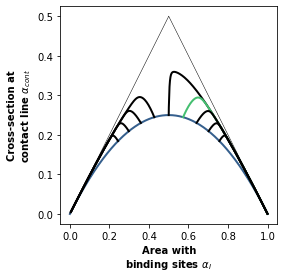

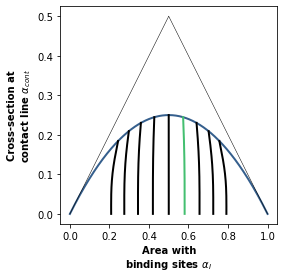

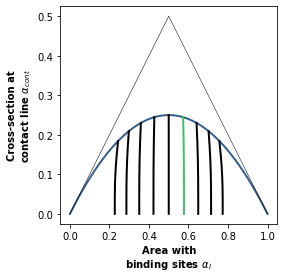

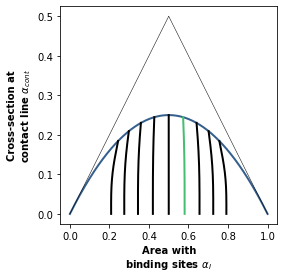

In [131]:
#################################
# --- Flow Plots: proteins ---
for i, traj_name in enumerate(["1_2", "1_5", "1_7", "2_5"]):
    fig, ax = plt.subplots(figsize=(4,4))

    # Plot the flow plot
    ax.plot(A_I_vals, sphere, color=plt.cm.viridis(0.3), linewidth=2, label="Sphere")
    ax.plot(np.linspace(0, 0.5, 1000), np.linspace(0, 0.5, 1000), linewidth=0.5, color='black')
    ax.plot(np.linspace(0.5, 1, 1000), 1 - np.linspace(0.5, 1, 1000), linewidth=0.5, color='black')
    ax.set_xlabel('Area with\n'+ r'binding sites $\alpha_I$', fontweight = 'bold')
    ax.set_ylabel('Cross-section at\n' + r'contact line $\alpha_{cont}$', fontweight='bold')
    ax.set_aspect(2)

    # Add trajectories
    for j in range(1, 10):
        file_path = os.path.join(directory, 'trajectories_t_zeta', f'trajectory_{traj_name}_{j}.csv')
        df = pd.read_csv(file_path, header=None)

        if j == 6:
            ax.plot(df[0].values, df[1].values, color=plt.cm.viridis(0.7), lw=2)
            
            fig_nu, ax_nu = plt.subplots(figsize=(0.8, 0.6), facecolor='white')

            # Plot nu
            nu_f_line, = ax_nu.plot(df[5].values, df[2].values, label=r"$\nu_{f,I}$", color=plt.cm.viridis(0.7), lw=1)
            nu_d_line, = ax_nu.plot(df[5].values, df[3].values, label=r"$\nu_{d,I}$", color=plt.cm.viridis(0.7), linestyle='--', lw=1)
            ax_nu.axhline(y=df[2].values[0], label=r"$\nu_{f,I, 0}$, $\nu_{d,I, 0}$", color='black', linestyle=':', lw=0.5)

            ax_nu.set_xlabel(r"Time $\frac{t}{\tau_{cont}}$", fontweight = 'bold', fontsize = 8)
            ax_nu.set_ylabel("Protein fraction\n" + r"$\nu_I\ \cdot\ 10^{-3}$", fontweight = 'bold', color = plt.cm.viridis(0.7), fontsize = 8)
            ax_nu.tick_params(axis='y', colors = plt.cm.viridis(0.7))
            ax_nu.set_xlim([0, max(df[5].values)])
            
            # Choose locations for yticks (can customize spacing if needed)
            ytick_vals = np.linspace(min(df[3].values), max(df[2].values), 2)

            # Set tick locations
            ax_nu.set_yticks(ytick_vals)

            # Set tick labels (rescaled values, multiplied by 100)
            ax_nu.set_yticklabels([f"{val * 1000:.0f}" for val in ytick_vals])

            # Plot score
            ax_nu_score = ax_nu.twinx()
            score_line, = ax_nu_score.plot(df[5].values, df[4].values, color='black', label=r"$s$", lw=2)

            ax_nu_score.set_ylabel(r"Score $s$", fontweight = 'bold')
            ax_nu_score.set_ylim([min(df[4].values), 0.22])

            # Save each plot separately
            plt.savefig(f'figures/nu_trajectories/trajectory{traj_name}.svg', dpi=300, facecolor = 'white', bbox_inches='tight')
            plt.close(fig_nu)
            
        elif j == 1:
            ax.plot(df[0].values, df[1].values, color='black', lw=2, label='Trajectory')
        else:
            ax.plot(df[0].values, df[1].values, color='black', lw=2)

    # Save and show the first flow plot figure
    plt.savefig(f'figures/trajectories/trajectories_t_n/trajectory{traj_name}.svg', dpi=300)
    plt.show()
    plt.close(fig)

Errors: [0]


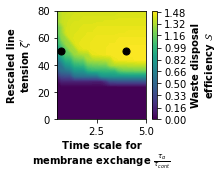

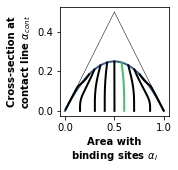

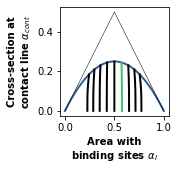

In [134]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_t_a.csv')
df = pd.read_csv(file_path, header=None)
df[1]=df[1]/asize # t_a was rescaled by inverse a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Time scale for\n' + r'membrane exchange $\frac{\tau_\alpha}{\tau_{cont}}$')

points = [(0.7, 50), (4,50)]
for x, y in points:
    ax.scatter(x, y, marker='o', c='black', s=50, zorder=3)
    
# Save plot
plt.savefig(f'figures/Score/t_a.svg', dpi=300)
plt.show()
plt.close(fig)

fig, ax = plt.subplots(figsize=(2,2))

# Plot the flow plot
ax.plot(A_I_vals, sphere, color=plt.cm.viridis(0.3), linewidth=2, label="Sphere")
ax.plot(np.linspace(0, 0.5, 1000), np.linspace(0, 0.5, 1000), linewidth=0.5, color='black')
ax.plot(np.linspace(0.5, 1, 1000), 1 - np.linspace(0.5, 1, 1000), linewidth=0.5, color='black')
ax.set_xlabel('Area with\n'+ r'binding sites $\alpha_I$', fontweight = 'bold')
ax.set_ylabel('Cross-section at\n' + r'contact line $\alpha_{cont}$', fontweight='bold')
ax.set_aspect(2)

# Add trajectories
for j in range(1, 10):
    file_path = os.path.join(directory, 'trajectories_t_zeta', f'trajectory_ta_0.7_5_{j}.csv')
    df = pd.read_csv(file_path, header=None)

    if j == 6:
        ax.plot(df[0].values, df[1].values, color=plt.cm.viridis(0.7), lw=2)

        fig_nu, ax_nu = plt.subplots(figsize=(0.8, 0.6), facecolor='white')

        # Plot nu
        nu_f_line, = ax_nu.plot(df[5].values, df[2].values, label=r"$\nu_{f,I}$", color=plt.cm.viridis(0.7), lw=1)
        nu_d_line, = ax_nu.plot(df[5].values, df[3].values, label=r"$\nu_{d,I}$", color=plt.cm.viridis(0.7), linestyle='--', lw=1)
        ax_nu.axhline(y=df[2].values[0], label=r"$\nu_{f,I, 0}$, $\nu_{d,I, 0}$", color='black', linestyle=':', lw=0.5)

        ax_nu.set_xlabel(r"Time $\frac{t}{\tau_{cont}}$", fontweight = 'bold', fontsize = 8)
        ax_nu.set_ylabel("Protein fraction\n" + r"$\nu_I\ \cdot\ 10^{-3}$", fontweight = 'bold', color = plt.cm.viridis(0.7))
        ax_nu.tick_params(axis='y', colors = plt.cm.viridis(0.7))
        ax_nu.set_xlim([0, max(df[5].values)])
        
        # Choose locations for yticks (can customize spacing if needed)
        ytick_vals = np.linspace(min(df[3].values), max(df[2].values), 2)

        # Set tick locations
        ax_nu.set_yticks(ytick_vals)

        # Set tick labels (rescaled values, multiplied by 100)
        ax_nu.set_yticklabels([f"{val * 1000:.0f}" for val in ytick_vals])

        # Plot score
        ax_nu_score = ax_nu.twinx()
        score_line, = ax_nu_score.plot(df[5].values, df[4].values, color='black', label=r"$s$", lw=2)

        ax_nu_score.set_ylabel(r"Score $s$", fontweight = 'bold', fontsize = 8)
        ax_nu_score.set_ylim([min(df[4].values), 0.22])

        # Save each plot separately
        plt.savefig(f'figures/nu_trajectories/trajectory_ta_0.7_5.svg', dpi=300, facecolor = 'white', bbox_inches='tight')
        plt.close(fig_nu)

    elif j == 1:
        ax.plot(df[0].values, df[1].values, color='black', lw=2, label='Trajectory')
    else:
        ax.plot(df[0].values, df[1].values, color='black', lw=2)

# Save and show the first flow plot figure
plt.savefig(f'figures/trajectories/trajectories_t_a/trajectory_0.7_5.svg', dpi=300)
plt.show()
plt.close(fig)


fig, ax = plt.subplots(figsize=(2,2))

# Plot the flow plot
ax.plot(A_I_vals, sphere, color=plt.cm.viridis(0.3), linewidth=2, label="Sphere")
ax.plot(np.linspace(0, 0.5, 1000), np.linspace(0, 0.5, 1000), linewidth=0.5, color='black')
ax.plot(np.linspace(0.5, 1, 1000), 1 - np.linspace(0.5, 1, 1000), linewidth=0.5, color='black')
ax.set_xlabel('Area with\n'+ r'binding sites $\alpha_I$', fontweight = 'bold')
ax.set_ylabel('Cross-section at\n' + r'contact line $\alpha_{cont}$', fontweight='bold')
ax.set_aspect(2)

# Add trajectories
for j in range(1, 10):
    file_path = os.path.join(directory, 'trajectories_t_zeta', f'trajectory_ta_4.0_5_{j}.csv')
    df = pd.read_csv(file_path, header=None)

    if j == 6:
        ax.plot(df[0].values, df[1].values, color=plt.cm.viridis(0.7), lw=2)

        fig_nu, ax_nu = plt.subplots(figsize=(0.8, 0.6), facecolor='white')

        # Plot nu
        nu_f_line, = ax_nu.plot(df[5].values, df[2].values, label=r"$\nu_{f,I}$", color=plt.cm.viridis(0.7), lw=1)
        nu_d_line, = ax_nu.plot(df[5].values, df[3].values, label=r"$\nu_{d,I}$", color=plt.cm.viridis(0.7), linestyle='--', lw=1)
        ax_nu.axhline(y=df[2].values[0], label=r"$\nu_{f,I, 0}$, $\nu_{d,I, 0}$", color='black', linestyle=':', lw=0.5)

        ax_nu.set_xlabel(r"Time $\frac{t}{\tau_{cont}}$", fontweight = 'bold', fontsize = 8)
        ax_nu.set_ylabel("Protein fraction\n" + r"$\nu_I\ \cdot\ 10^{-3}$", fontweight = 'bold', color = plt.cm.viridis(0.7))
        ax_nu.tick_params(axis='y', colors = plt.cm.viridis(0.7))
        ax_nu.set_xlim([0, max(df[5].values)])
        
        # Choose locations for yticks (can customize spacing if needed)
        ytick_vals = np.linspace(min(df[3].values), max(df[2].values), 2)

        # Set tick locations
        ax_nu.set_yticks(ytick_vals)

        # Set tick labels (rescaled values, multiplied by 100)
        ax_nu.set_yticklabels([f"{val * 1000:.0f}" for val in ytick_vals])

        # Plot score
        ax_nu_score = ax_nu.twinx()
        score_line, = ax_nu_score.plot(df[5].values, df[4].values, color='black', label=r"$s$", lw=2)

        ax_nu_score.set_ylabel(r"Score $s$", fontweight = 'bold', fontsize = 8)
        ax_nu_score.set_ylim([min(df[4].values), 0.22])

        # Save each plot separately
        plt.savefig(f'figures/nu_trajectories/trajectory_ta_4.0_5.svg', dpi=300, facecolor = 'white', bbox_inches='tight')
        plt.close(fig_nu)

    elif j == 1:
        ax.plot(df[0].values, df[1].values, color='black', lw=2, label='Trajectory')
    else:
        ax.plot(df[0].values, df[1].values, color='black', lw=2)

# Save and show the first flow plot figure
plt.savefig(f'figures/trajectories/trajectories_t_a/trajectory_4.0_5.svg', dpi=300)
plt.show()

Errors: [0]


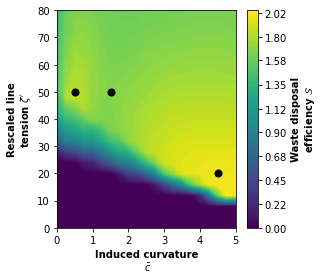

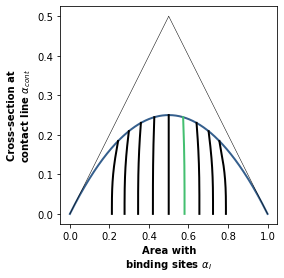

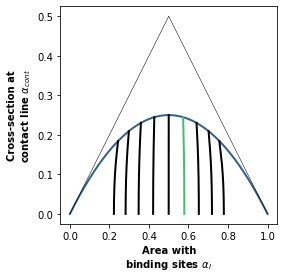

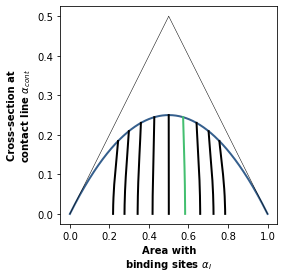

In [26]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_c.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Induced curvature\n' + r" $\bar{c}$")


points = [(0.5, 50), (1.5,50), (4.5, 20)]
for x, y in points:
    ax.scatter(x, y, marker='o', c='black', s=50, zorder=3)

# Save plot
plt.savefig(f'figures/Score/c.svg', dpi=300)
plt.show()
plt.close(fig)

#################################
# --- Flow Plots: proteins ---
for i, traj_name in enumerate(["0.5_5", "1.5_5", "4.5_2"]):
    fig, ax = plt.subplots(figsize=(4,4))

    # Plot the flow plot
    ax.plot(A_I_vals, sphere, color=plt.cm.viridis(0.3), linewidth=2, label="Sphere")
    ax.plot(np.linspace(0, 0.5, 1000), np.linspace(0, 0.5, 1000), linewidth=0.5, color='black')
    ax.plot(np.linspace(0.5, 1, 1000), 1 - np.linspace(0.5, 1, 1000), linewidth=0.5, color='black')
    ax.set_xlabel('Area with\n'+ r'binding sites $\alpha_I$', fontweight = 'bold')
    ax.set_ylabel('Cross-section at\n' + r'contact line $\alpha_{cont}$', fontweight='bold')
    ax.set_aspect(2)

    # Add trajectories
    for j in range(1, 10):
        file_path = os.path.join(directory, 'trajectories_c_zeta', f'trajectory_c_{traj_name}_{j}.csv')
        df = pd.read_csv(file_path, header=None)

        if j == 6:
            ax.plot(df[0].values, df[1].values, color=plt.cm.viridis(0.7), lw=2)
            
            fig_nu, ax_nu = plt.subplots(figsize=(0.8, 0.6), facecolor='white')

            # Plot nu
            nu_f_line, = ax_nu.plot(df[5].values, df[2].values, label=r"$\nu_{f,I}$", color=plt.cm.viridis(0.7), lw=1)
            nu_d_line, = ax_nu.plot(df[5].values, df[3].values, label=r"$\nu_{d,I}$", color=plt.cm.viridis(0.7), linestyle='--', lw=1)
            ax_nu.axhline(y=df[2].values[0], label=r"$\nu_{f,I, 0}$, $\nu_{d,I, 0}$", color='black', linestyle=':', lw=0.5)

            ax_nu.set_xlabel(r"Time $\frac{t}{\tau_{cont}}$", fontweight = 'bold', fontsize = 8)
            ax_nu.set_ylabel("Protein fraction\n" + r"$\nu_I\ \cdot\ 10^{-2}$", fontweight = 'bold', color = plt.cm.viridis(0.7), fontsize = 8)
            ax_nu.tick_params(axis='y', colors = plt.cm.viridis(0.7))

            # Choose locations for yticks (can customize spacing if needed)
            ytick_vals = np.linspace(min(df[3].values), max(df[2].values), 2)

            # Set tick locations
            ax_nu.set_yticks(ytick_vals)

            # Set tick labels (rescaled values, multiplied by 100)
            ax_nu.set_yticklabels([f"{val * 1000:.0f}" for val in ytick_vals])

            # Plot score
            ax_nu_score = ax_nu.twinx()
            score_line, = ax_nu_score.plot(df[5].values, df[4].values, color='black', label=r"$s$", lw=2)

            ax_nu_score.set_ylabel(r"Score $s$", fontweight = 'bold')
            ax_nu_score.set_ylim([min(df[4].values), max(df[4].values)+0.02])

            # Save each plot separately
            plt.savefig(f'figures/nu_trajectories/trajectory_c_{traj_name}.svg', dpi=300, facecolor = 'white', bbox_inches='tight')
            plt.close(fig_nu)
            
        elif j == 1:
            ax.plot(df[0].values, df[1].values, color='black', lw=2, label='Trajectory')
        else:
            ax.plot(df[0].values, df[1].values, color='black', lw=2)

    # Save and show the first flow plot figure
    plt.savefig(f'figures/trajectories/trajectories_c/trajectory{traj_name}.svg', dpi=300)
    plt.show()
    plt.close(fig)

# Without trajectories

Errors: [0]


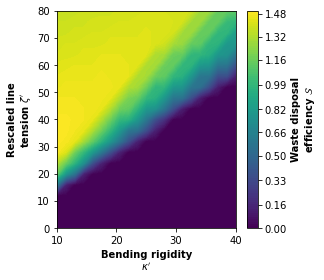

In [112]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_kappa.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
df[0] = df[0]/asize # kappa was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Bending rigidity\n' + r"$\kappa'$")
    
# Save plot
plt.savefig(f'figures/Score/kappa.pdf', dpi=300, bbox_inches='tight')

Errors: [0]


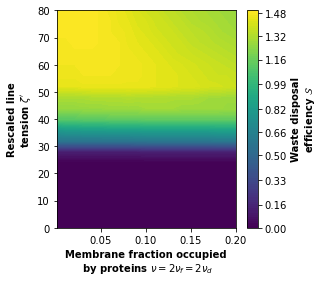

In [113]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_n.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Membrane fraction occupied\n' + r" by proteins $\nu = 2 \nu_f = 2 \nu_d$")
    
# Save plot
plt.savefig(f'figures/Score/nu.pdf', dpi=300, bbox_inches='tight')

Errors: [0]


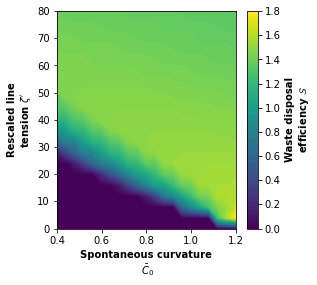

In [115]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_C0.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Spontaneous curvature\n' + r" $\bar{C}_0$")
    
# Save plot
plt.savefig(f'figures/Score/C0.pdf', dpi=300, bbox_inches='tight')

Errors: [0]


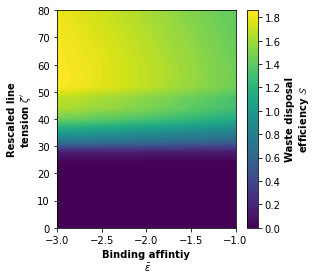

In [14]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_epsilon.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Binding affintiy\n' + r" $\bar{\epsilon}$")
    
# Save plot
plt.savefig(f'figures/Score/epsilon.pdf', dpi=300, bbox_inches='tight')

## Interplay of density and curvature

Errors: [0]


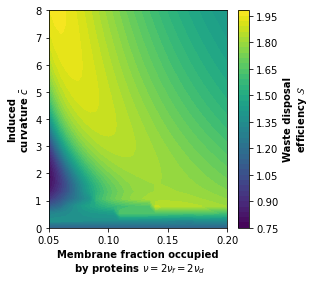

In [54]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_c_n.csv')
df = pd.read_csv(file_path, header=None)

print('Errors:', df[3].drop_duplicates().values)
df_pivot = df.pivot(index=1, columns=0, values=2) # Score

X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
Z = df_pivot.values

contour = ax.contourf(X, Y, Z, levels = 40, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax) 
cbar.set_label("Waste disposal\n" + r"efficiency $\mathcal{S}$", fontweight = 'bold')

ax.set_xlabel('Membrane fraction occupied\n' + r" by proteins $\nu = 2 \nu_f = 2 \nu_d$", fontweight = 'bold')
ax.set_ylabel("Induced\n" + r"curvature $\bar{c}$", fontweight = 'bold')
    
# Save plot
plt.savefig(f'figures/Score/Score_c_nu.svg', dpi=300, bbox_inches='tight')

Errors: [0]


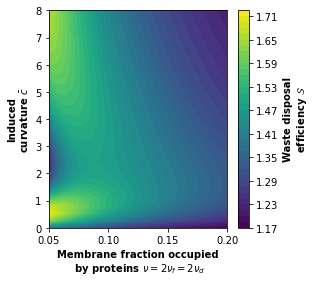

In [55]:
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main', 'Score_c_n_large_zeta.csv')
df = pd.read_csv(file_path, header=None)

print('Errors:', df[3].drop_duplicates().values)
df_pivot = df.pivot(index=1, columns=0, values=2) # Score

X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
Z = df_pivot.values

contour = ax.contourf(X, Y, Z, levels =50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax) 
cbar.set_label("Waste disposal\n" + r"efficiency $\mathcal{S}$", fontweight = 'bold')

ax.set_xlabel('Membrane fraction occupied\n' + r" by proteins $\nu = 2 \nu_f = 2 \nu_d$", fontweight = 'bold')
ax.set_ylabel("Induced\n" + r"curvature $\bar{c}$", fontweight = 'bold')

# Save plot
plt.savefig(f'figures/Score/Score_c_nu_small_zeta.svg', dpi=300, bbox_inches='tight')

# Score NPC

Errors: [0]


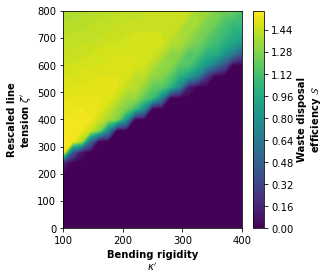

In [89]:
asize=1/10000

# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main_NPC', 'Score_kappa.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
df[0] = df[0]/asize # kappa was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Bending rigidity\n' + r"$\kappa'$")
    
# Save plot
plt.savefig(f'figures/Score/kappa_NPC.svg', dpi=300, bbox_inches='tight')

Errors: [0]


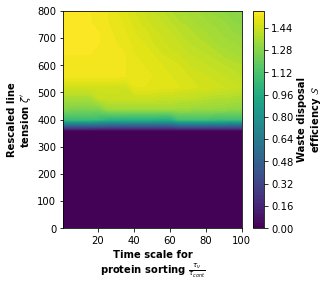

In [88]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main_NPC', 'Score_t_n.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
df[0] = df[0] # kappa was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Time scale for\n' + r"protein sorting $\frac{\tau_\nu}{\tau_{cont}}$")

# Save plot
plt.savefig(f'figures/Score/t_n_NPC.svg', dpi=300, bbox_inches='tight')

Errors: [0]


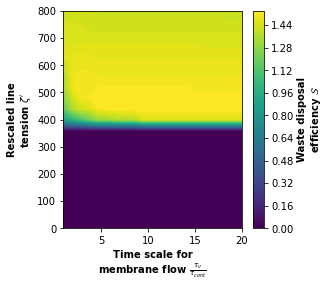

In [87]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main_NPC', 'Score_t_a.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
df[0] = df[0] # kappa was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Time scale for\n' + r"membrane flow $\frac{\tau_\nu}{\tau_{cont}}$")

# Save plot
plt.savefig(f'figures/Score/t_a_NPC.svg', dpi=300, bbox_inches='tight')

Errors: [0]


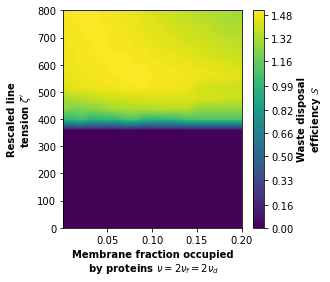

In [86]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main_NPC', 'Score_n.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
df[0] = df[0] # kappa was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, 'Membrane fraction occupied\n' + r" by proteins $\nu = 2 \nu_f = 2 \nu_d$")

# Save plot
plt.savefig(f'figures/Score/n_NPC.svg', dpi=300, bbox_inches='tight')

Errors: [0]


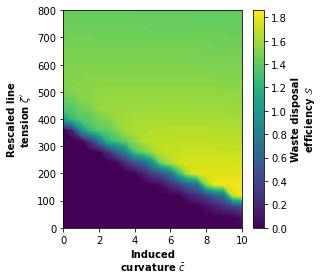

In [85]:
# --- Figure 1: Heatmap ---
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust size for a single plot

# Load and plot the heatmap
file_path = os.path.join(directory, 'Score_main_NPC', 'Score_c.csv')
df = pd.read_csv(file_path, header=None)
df[1] = df[1]/asize # zeta was rescaled by a/A in Matlab
df[0] = df[0] # kappa was rescaled by a/A in Matlab
print('Errors:', df[3].drop_duplicates().values)
plot_contour(ax, df, "Induced\n" + r"curvature $\bar{c}$")

# Save plot
plt.savefig(f'figures/Score/c_NPC.svg', dpi=300, bbox_inches='tight')